In [1]:
#clean up csv files
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#variables for files
file = 'Data/data.csv'
file_genre = 'Data/data_by_genres.csv'

In [3]:
#import csvs
genre_df = pd.read_csv(file_genre)
df = pd.read_csv(file)

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
#remove brackets, quotations, etc.
clean_df = df
clean_df['artists'] = df['artists'].str.strip('[]')
clean_df['artists'] = df['artists'].str.strip("''")
clean_df['artists'] = df['artists'].str.strip('""')
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
#Drop columns and change column names
clean_df = clean_df[["artists", "danceability", "duration_ms", "explicit", "key", "mode", "name",
                     "popularity", "tempo", "year"]]
clean_df = clean_df.rename(columns={"artists":"Artists", "danceability":"Danceability (0-1)", 
                                    "duration_ms":"Duration (seconds)", "explicit":"Explicit",
                                    "key":"Key", "mode":"Mode", "name":"Song Title",
                                    "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)", "year":"Release Year"})

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168333,0,5,0,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150200,0,5,0,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163827,0,0,1,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422087,0,2,1,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165224,1,10,0,Xuniverxe,2,122.076,1920


In [7]:
#update columns with more relevant values
clean_df["Duration (seconds)"] = ((clean_df["Duration (seconds)"]) / 1000)
clean_df['Explicit'] = clean_df['Explicit'].apply(str)
clean_df['Explicit'] = clean_df['Explicit'].str.replace('0', 'No')
clean_df['Explicit'] = clean_df['Explicit'].str.replace('1', 'Yes')
clean_df['Mode'] = clean_df['Mode'].apply(str)
clean_df['Mode'] = clean_df['Mode'].str.replace('0', 'Minor')
clean_df['Mode'] = clean_df['Mode'].str.replace('1', 'Major')
clean_df['Key'] = clean_df['Key'].apply(str)
clean_df['Key'] = clean_df['Key'].str.replace('10', 'Bb')
clean_df['Key'] = clean_df['Key'].str.replace('11', 'B')
clean_df['Key'] = clean_df['Key'].str.replace('0', 'C')
clean_df['Key'] = clean_df['Key'].str.replace('1', 'Db')
clean_df['Key'] = clean_df['Key'].str.replace('2', 'D')
clean_df['Key'] = clean_df['Key'].str.replace('3', 'Eb')
clean_df['Key'] = clean_df['Key'].str.replace('4', 'E')
clean_df['Key'] = clean_df['Key'].str.replace('5', 'F')
clean_df['Key'] = clean_df['Key'].str.replace('6', 'Gb')
clean_df['Key'] = clean_df['Key'].str.replace('7', 'G')
clean_df['Key'] = clean_df['Key'].str.replace('8', 'Ab')
clean_df['Key'] = clean_df['Key'].str.replace('9', 'A')

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920


In [8]:
#Clean up second dataframe
#Drop columns and change column names
clean_genre_df = genre_df
clean_genre_df = clean_genre_df[["genres", "danceability", "tempo", 
                                 "popularity", "key", "mode"]]
clean_genre_df = clean_genre_df.rename(columns={"genres":"Genres", "danceability":"Danceability (0-1)", 
                                                "key":"Key", "mode":"Mode",
                                                "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)"})

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,4,1
1,432hz,0.312000,118.900933,41.200000,11,1
2,8-bit,0.673000,192.816000,0.000000,5,1
3,[],0.546937,116.068980,12.350770,7,1
4,a cappella,0.516172,105.506031,39.086248,7,1


In [9]:
#drop row with bad data
clean_genre_df = clean_genre_df.drop(3)

In [10]:
#update columns with more relevant values

clean_genre_df['Mode'] = clean_genre_df['Mode'].apply(str)
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('0', 'Minor')
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('1', 'Major')
clean_genre_df['Key'] = clean_genre_df['Key'].apply(str)
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('10', 'Bb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('11', 'B')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('0', 'C')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('1', 'Db')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('2', 'D')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('3', 'Eb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('4', 'E')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('5', 'F')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('6', 'Gb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('7', 'G')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('8', 'Ab')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('9', 'A')

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,E,Major
1,432hz,0.312000,118.900933,41.200000,B,Major
2,8-bit,0.673000,192.816000,0.000000,F,Major
4,a cappella,0.516172,105.506031,39.086248,G,Major
5,abstract,0.473600,142.495400,43.800000,F,Major


In [11]:
#Obtain track counts for artists and create a dataframe from that information
artist_prolific_df = clean_df['Artists'].value_counts().reset_index()
artist_prolific_df = artist_prolific_df.rename(columns={"index":"Artist Name", "Artists":"Track Count"})
artist_prolific_df.head(20)

,Artist Name,Track Count
0,Tadeusz Dolega Mostowicz,1281
1,Эрнест Хемингуэй,1175
2,Эрих Мария Ремарк,1062
3,Francisco Canaro,951
4,Ignacio Corsini,624
5,Frank Sinatra,621
6,Elvis Presley,494
7,Bob Dylan,459
8,"Francisco Canaro', 'Charlo",456
9,Johnny Cash,456


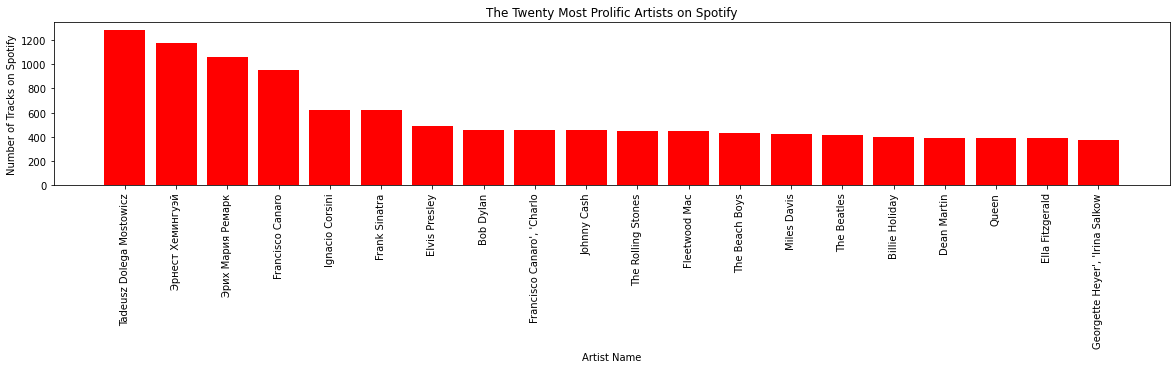

In [12]:
#Create visualizations for artist prolific data
x_axis = artist_prolific_df["Artist Name"].head(20)
y_axis = artist_prolific_df["Track Count"].head(20)
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='r', align="center")
plt.xticks(rotation="90")
plt.title("The Twenty Most Prolific Artists on Spotify")
plt.xlabel("Artist Name")
plt.ylabel("Number of Tracks on Spotify")
plt.savefig('Images/ProlificBar.png', bbox_inches='tight')

# Find Most Popular Genre

#### How is popularity defined by Spotify? "The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks."

In [13]:
#Redesignate dataframe name to prevent cross-work between collaborators.
genre_data = clean_genre_df

#print dataframe to confirm its functionality
genre_data

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,E,Major
1,432hz,0.312000,118.900933,41.200000,B,Major
2,8-bit,0.673000,192.816000,0.000000,F,Major
4,a cappella,0.516172,105.506031,39.086248,G,Major
5,abstract,0.473600,142.495400,43.800000,F,Major
...,...,...,...,...,...,...
3227,zim urban groove,0.553000,134.995000,9.000000,G,Major
3228,zolo,0.533837,126.765194,31.108254,A,Major
3229,zouk,0.641889,105.848889,32.555556,G,Major
3230,zurich indie,0.705667,91.278000,0.000000,G,Minor


In [14]:
#Make genre column into string so all data is the same type
genre_data['Genres'] = genre_data['Genres'].apply(str)

#Sort Popularity in descending order to confirm most popular genre.
sorted_genre = genre_data.sort_values("Popularity (0-100)", ascending=False)
sorted_genre

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
565,chinese electropop,0.660,142.018,79.0,Db,Minor
1768,korean mask singer,0.658,128.909,78.0,A,Minor
996,dutch rap pop,0.767,169.990,77.0,F,Major
3213,yaoi,0.603,135.028,77.0,Ab,Minor
945,dong-yo,0.829,115.056,76.0,Ab,Major
...,...,...,...,...,...,...
2090,neo-kraut,0.705,123.993,0.0,A,Major
574,chip hop,0.780,77.060,0.0,Eb,Major
2284,pagode baiano,0.642,211.968,0.0,E,Major
257,batida,0.861,119.984,0.0,B,Major


#### With the cleaned and sorted data, we find that the most popular genre is Chinese Electropop.

# Find Most Popular Artist

In [18]:
#Redesignate dataframe name to prevent cross-work between collaborators.
genre_data = clean_df

#Sort Popularity in descending order to confirm most popular artist.
sorted_data = clean_df.sort_values("Popularity (0-100)", ascending=False)
sorted_data = sorted_data.dropna()
sorted_data

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
20062,Olivia Rodrigo,0.585,242.014,Yes,Bb,Major,drivers license,100,143.874,2021
19862,"24kGoldn', 'iann dior",0.700,140.526,Yes,G,Minor,Mood (feat. iann dior),96,90.989,2020
19866,Ariana Grande,0.737,172.325,Yes,C,Major,positions,96,144.015,2020
19886,"Bad Bunny', 'Jhay Cortez",0.731,205.090,Yes,E,Minor,DÁKITI,95,109.928,2020
19976,KAROL G,0.863,178.947,Yes,Db,Minor,BICHOTA,95,163.908,2020
...,...,...,...,...,...,...,...,...,...,...
63064,Tarun Banerjee,0.530,199.227,No,B,Minor,Phul Nebe Go,0,79.712,1952
63063,Georges Derveaux,0.209,162.623,No,D,Major,Habanera,0,139.475,1952
63062,Эрнест Хемингуэй,0.800,95.700,Yes,Gb,Major,Часть 44.3 - Старик и море,0,42.490,1952
63061,"Hector Berlioz', 'Concertgebouworkest', 'Eduar...",0.276,370.787,No,A,Major,"Symphonie fantastique, Op. 14, H 48: 2. Un bal...",0,89.437,1952


#### Currently Olivia Rodrigo is most popular with her song Drivers License. 

In [19]:
#To find out more about Olivia Rodrigo, we use loc to gather data regarding only her.
olivia_data =  sorted_data.loc[sorted_data["Artists"] == "Olivia Rodrigo", [
    "Artists", "Song Title", "Popularity (0-100)"]]
olivia_data

,Artists,Song Title,Popularity (0-100)
20062,Olivia Rodrigo,drivers license,100
19732,Olivia Rodrigo,"All I Want - From ""High School Musical: The Mu...",82
110088,Olivia Rodrigo,All I Want,75


#### All three of her songs available on Spotify are incredibly popular. 

# Find the Artists Currently Most Popular per Decade

In [21]:
#Find range for years.
clean_df.describe()

#create new call-name for dataframe
decade_data = clean_df

#Minimum year is 1920, with max being 2021. Now we set our bins.
bins = [1920, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

decade = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

#Using bins we create a column just for them.
decade_data["Decades"] = pd.cut(decade_data["Release Year"], bins, labels=decade, include_lowest=True)

#Drop rows for 2020 and 2021, as these are for an incomplete decade.
decade_data.dropna()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year,Decades
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920,1920s
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920,1920s
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920,1920s
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920,1920s
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920,1920s
...,...,...,...,...,...,...,...,...,...,...,...
174116,Workout Music,0.734,277.493,No,C,Minor,RITMO (Bay Boys For Life) [Remix],14,128.015,2019,2010s
174118,Workout Music,0.533,287.987,No,F,Major,Beautiful People (Remix),14,129.943,2019,2010s
174120,Workout Music,0.764,268.120,No,D,Major,Tusa (Remix),16,127.994,2019,2010s
174124,October,0.520,226.603,No,Db,Major,A Good Year - 2020 Remastered,5,123.976,2013,2010s


In [22]:
#Focus on decade data, create dataframe for 1920s.
twenties =  decade_data.loc[decade_data["Decades"] == "1920s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
twenties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
1662,Louis Armstrong,Mack the Knife,51,1929,1920s
1462,Benny Goodman,"Sing, Sing, Sing",50,1928,1920s
1062,Fats Waller,Ain't Misbehavin',47,1926,1920s
1463,Blind Willie Johnson,"Dark Was the Night, Cold Was the Ground",46,1928,1920s
1063,Fats Waller,Two Sleepy People,44,1926,1920s
...,...,...,...,...,...
20803,"Hans Pfitzner', 'Staatskapelle Berlin",Die Rose vom Liebesgarten - Zwischenspiele: Fu...,0,1927,1920s
20802,Arthur Conan Doyle,Chapter 61.2 & Chapter 62.1 - Dolina strachu,0,1927,1920s
20800,Arthur Conan Doyle,Chapter 86.2 & Chapter 87.1 - Dolina strachu,0,1927,1920s
20799,Ignacio Corsini,Patio Olvidado - Remasterizado,0,1927,1920s


In [23]:
#Focus on decade data, create dataframe for 1930s.
thirties =  decade_data.loc[decade_data["Decades"] == "1930s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
thirties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
2462,"Billie Holiday', 'Eddie Heywood",All of Me (with Eddie Heywood & His Orchestra),63,1933,1930s
3662,Harry James,"It's Been a Long, Long Time",59,1939,1930s
2463,Art Tatum,Tea for Two,53,1933,1930s
3262,Robert Johnson,Cross Road Blues,53,1937,1930s
3665,Lead Belly,Where Did You Sleep Last Night,51,1939,1930s
...,...,...,...,...,...
41078,"Charras Gonzalez', 'Veronica Gonzalez Day', 'A...",Que c´est triste Venise,0,1934,1930s
41077,"Charras Gonzalez', 'Veronica Gonzalez Day', 'A...",Soledad,0,1934,1930s
41075,Maurice Jaubert,Part.1 (From En Crète sans les dieux) (1934),0,1934,1930s
41073,Κώστας Μαυρέας,Για πες αλεύρι,0,1934,1930s


In [24]:
#Focus on decade data, create dataframe for 1940s.
forties =  decade_data.loc[decade_data["Decades"] == "1940s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
forties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
4262,"Bing Crosby', 'Ken Darby Singers', 'John Scott...",White Christmas,80,1942,1940s
4662,Judy Garland,Have Yourself A Merry Little Christmas,74,1944,1940s
5262,Gene Autry,Here Comes Santa Claus (Right Down Santa Claus...,73,1947,1940s
5663,"Erik Satie', 'Philippe Entremont",Gymnopédie No. 1,68,1949,1940s
5662,"Bing Crosby', 'The Andrews Sisters",Twelve Days Of Christmas,68,1949,1940s
...,...,...,...,...,...
61280,Max Hansen,Sommer i Tyrol/Rigdom har jeg ej,0,1943,1940s
61281,Ellen Gottschalch,Sommer i Tyrol/I Salzkammergut,0,1943,1940s
61282,"Errol Flynn', 'Spike Jones Orchestra",That's What You Jolly Well Get,0,1943,1940s
61283,Valdemar Davids,Ved landsbyens gadekær,0,1943,1940s


In [25]:
#Focus on decade data, create dataframe for 1950s.
fifties =  decade_data.loc[decade_data["Decades"] == "1950s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
fifties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
7262,Bobby Helms,Jingle Bell Rock,85,1957,1950s
7662,Dean Martin,Let It Snow! Let It Snow! Let It Snow!,84,1959,1950s
7263,Elvis Presley,Blue Christmas,79,1957,1950s
7666,Chuck Berry,Johnny B. Goode,75,1959,1950s
7664,Dean Martin,Rudolph The Red-Nosed Reindeer,75,1959,1950s
...,...,...,...,...,...
113030,"G. M. Durrani', 'Geeta Dutt",Jab Tak Chamke Chand Sitare,0,1952,1950s
144920,Αντώνης Καλυβόπουλος,Το μπουζούκι μου κρατάω,0,1950,1950s
144919,Geeta Dutt,Tu Kahan Chala,0,1950,1950s
144918,Three male Vodoun drummers,Vodoun Dance (Three Vodoun Drums),0,1950,1950s


In [26]:
#Focus on decade data, create dataframe for 1960s.
sixties =  decade_data.loc[decade_data["Decades"] == "1960s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
sixties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
8662,Brenda Lee,Rockin' Around The Christmas Tree,87,1964,1960s
8462,Andy Williams,It's the Most Wonderful Time of the Year,85,1963,1960s
9663,The Beatles,Here Comes The Sun - Remastered 2009,82,1969,1960s
8463,The Ronettes,Sleigh Ride,82,1963,1960s
8262,Nat King Cole,The Christmas Song (Merry Christmas To You),81,1962,1960s
...,...,...,...,...,...
162386,"Howard Brubeck', 'The Dave Brubeck Quartet', '...",Dialogue for Jazz Combo and Orchestra: I. Alle...,4,1961,1960s
162375,"Lester Flatt', 'Earl Scruggs', 'Mother Maybell...","Jimmie Brown, The Newsboy (with Mother Maybell...",4,1961,1960s
162347,"Camille Saint-Saëns', 'Leonard Bernstein', 'Ne...",Carnival of the Animals: IV. Tortoises,4,1961,1960s
36795,Nancy Wilson,Ten Good Years - 2007 Digital Remaster,2,1965,1960s


In [27]:
#Focus on decade data, create dataframe for 1970s.
seventies =  decade_data.loc[decade_data["Decades"] == "1970s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
seventies.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
11262,Fleetwood Mac,Dreams - 2004 Remaster,86,1977,1970s
11062,Eagles,Hotel California - 2013 Remaster,83,1976,1970s
11662,AC/DC,Highway to Hell,82,1979,1970s
10262,Elton John,"Rocket Man (I Think It's Going To Be A Long, L...",81,1972,1970s
10662,Lynyrd Skynyrd,Sweet Home Alabama,81,1974,1970s
...,...,...,...,...,...
37625,Tangerine Dream,Rubycon - Advert / 2011 Remaster,3,1978,1970s
37613,Tangerine Dream,Phaedra - Advert / 2011 Remaster,3,1978,1970s
35863,The Groundhogs,A Year In The Life - 2003 Remastered Version,3,1971,1970s
93005,Greg Quill,Seven Years of Silence - 2016 Remaster,0,1975,1970s


In [28]:
#Focus on decade data, create dataframe for 1980s.
eighties =  decade_data.loc[decade_data["Decades"] == "1980s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
eighties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
12462,The Police,Every Breath You Take,84,1983,1980s
11863,AC/DC,Back In Black,84,1980,1980s
11862,Paul McCartney,Wonderful Christmastime - Edited Version / Rem...,83,1980,1980s
12263,Michael Jackson,Billie Jean,83,1982,1980s
12864,a-ha,Take on Me,83,1985,1980s
...,...,...,...,...,...
126204,Octobre,Élégante solution - Remasterisé en 2018,1,1982,1980s
126206,Octobre,Metropolitan Opera - Remasterisé en 2018,1,1982,1980s
142620,"Betha Sarasin', 'Markus Ganz",Yearning,0,1988,1980s
90055,Zulu Warriors,Dub In The Year 2000,0,1989,1980s


In [29]:
#Focus on decade data, create dataframe for 1990s.
nineties =  decade_data.loc[decade_data["Decades"] == "1990s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
nineties.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
14662,Mariah Carey,All I Want for Christmas Is You,90,1994,1990s
14663,"Frank Sinatra', 'B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with T...,84,1994,1990s
13863,AC/DC,Thunderstruck,82,1990,1990s
14067,R.E.M.,Losing My Religion,81,1991,1990s
14863,"Coolio', 'L.V.",Gangsta's Paradise,81,1995,1990s
...,...,...,...,...,...
140273,"Nathan Haines', 'Kenny Dope",Believe - Kenny Dope Remix,0,1996,1990s
89899,O-Trax,The Year 2000,0,1999,1990s
89929,Graeme E. Pearson & The Mutineers,The Year 2000,0,1996,1990s
89939,The Motor City Burgers,Year 2000 Snafu,0,1999,1990s


In [30]:
#Focus on decade data, create dataframe for 2000s.
two_thousands =  decade_data.loc[decade_data["Decades"] == "2000s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
two_thousands.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
15862,Coldplay,Yellow,85,2000,2000s
17462,Mother Mother,Hayloft,85,2008,2000s
15868,Linkin Park,In the End,83,2000,2000s
16263,"Eminem', 'Nate Dogg",'Till I Collapse,83,2002,2000s
16265,Coldplay,The Scientist,83,2002,2000s
...,...,...,...,...,...
91653,Cliff Bennett & The Rebel Rousers,Said I Weren't Gonna Tell Nobody - Mono; 2009 ...,0,2009,2000s
55735,The Womb,Five Years - Demo,0,2007,2000s
91649,Cliff Bennett & The Rebel Rousers,I'll Take Good Care of You - Mono; 2009 Remaster,0,2009,2000s
140183,"Tiësto', 'Maxi Jazz",Dance 4 life [ASOT 281] - Original Mix,0,2006,2000s


In [31]:
#Focus on decade data, create dataframe for 2010s.
twenty_tens =  decade_data.loc[decade_data["Decades"] == "2010s", [
    "Artists", "Song Title", "Popularity (0-100)", "Release Year", "Decades"]]
twenty_tens.sort_values("Popularity (0-100)", ascending=False)

,Artists,Song Title,Popularity (0-100),Release Year,Decades
19670,Harry Styles,Watermelon Sugar,91,2019,2010s
19470,Sia,Snowman,91,2018,2010s
19672,Lewis Capaldi,Someone You Loved,90,2019,2010s
19780,"Topic', 'A7S",Breaking Me,89,2019,2010s
18462,The Neighbourhood,Sweater Weather,89,2013,2010s
...,...,...,...,...,...
140682,Palaraga,Avoiding the Void,0,2018,2010s
140680,"Matt Fax', 'Dezza",Sweet Dream,0,2018,2010s
140678,Simone Lo Porto,Fiamma su fiamma,0,2018,2010s
140676,"Eleven Fly', 'March 13",Day Dream,0,2018,2010s


# Create Most Popular By Decade Dataframe

In [32]:
#Create dictionaries for dataframe creation
decade_dicts = [{"Artist": "Louis Armstrong", "Song Title": "Mac the Knife", "Decade": "1920s"},
                {"Artist": "Billie Holliday, Eddie Heywood", "Song Title": "All of Me (with Eddie Heywood & His Orchestra)", "Decade": "1930s"},
               {"Artist": "Bing Crosby", "Song Title": "White Christmas", "Decade": "1940s"},
               {"Artist": "Bobby Helms", "Song Title": "Jingle Bell Rock", "Decade": "1950s"},
               {"Artist": "Brenda Lee", "Song Title": "Rockin' Around the Christmas Tree", "Decade": "1960s"},
               {"Artist": "Fleetwood Mac", "Song Title": "Dreams", "Decade": "1970s"},
               {"Artist": "The Police", "Song Title": "Every Breath You Take", "Decade": "1980s"},
               {"Artist": "Mariah Carey", "Song Title": "All I Want for Christmas Is You", "Decade": "1990s"},
               {"Artist": "Coldplay", "Song Title": "Yellow", "Decade": "2000s"},
               {"Artist": "Harry Styles", "Song Title": "Watermelon Sugar", "Decade": "2010s"}]

# Convert a list of dictionaries into a dataframe
popular_decades = pd.DataFrame(decade_dicts)
popular_decades

,Artist,Song Title,Decade
0,Louis Armstrong,Mac the Knife,1920s
1,"Billie Holliday, Eddie Heywood",All of Me (with Eddie Heywood & His Orchestra),1930s
2,Bing Crosby,White Christmas,1940s
3,Bobby Helms,Jingle Bell Rock,1950s
4,Brenda Lee,Rockin' Around the Christmas Tree,1960s
5,Fleetwood Mac,Dreams,1970s
6,The Police,Every Breath You Take,1980s
7,Mariah Carey,All I Want for Christmas Is You,1990s
8,Coldplay,Yellow,2000s
9,Harry Styles,Watermelon Sugar,2010s


#### The above dataframe represents the most popular Artist with their song per decade. Apparently, Christmas music takes the lead in almost every single decade.